# Ultrafast Shape Recognition with solvent

DPAP trajectory in ACN (solute only) as benchmark system

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
import mdtraj
import os

%matplotlib inline

In [2]:
sys.path.append("../src")
import mdutils
import myclusters2
import mymetrics2
import pyusr

### set path and steps

In [3]:
path_to_trj="/home/g.mancini/scratch/DPAP_trajs/dpap_acn/"
do_rdf=0
do_ord=1
do_ext=1

### calculate rdf

In [4]:
%%bash -s $path_to_trj $do_rdf
cd $1
echo `pwd`
if [ $2 -eq 1 ]; then
    echo "1 2" > tmp
    gmx rdf -f center_50ps.xtc -n index.ndx < tmp >& /dev/null
    awk '$0!~/[@#]/' rdf.xvg > rdf.dat
    rm -f tmp
fi

/home/g.mancini/scratch/DPAP_trajs/dpap_acn


In [5]:
%cd /home/g.mancini/scratch/DPAP_trajs/dpap_acn/
rdf=np.loadtxt("rdf.dat")

/scratch/DPAP_trajs/dpap_acn


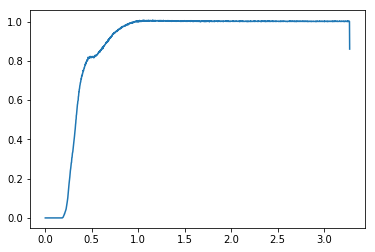

In [6]:
plt.plot(rdf[:,0],rdf[:,1])

### reorder solvent

In [13]:
%%bash -s $path_to_trj $do_ord
cd $1
if [ $2 -eq 1 ]; then
    echo "1 2" > tmp
    source /usr/local/gromacs-4.6.6/bin/GMXRC
    trjorder -s testD1.tpr -f center_50ps.xtc -na 6 -r 0.5 -n index -o order < tmp >& /dev/null
    awk '$0!~/[@#]/' nshell.xvg > nshell.dat
    rm -f tmp
fi

In [14]:
nshell=np.loadtxt("nshell.dat")

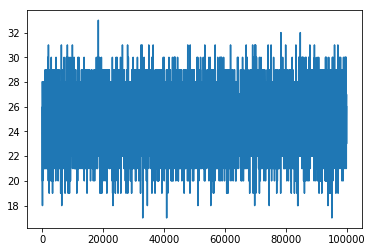

In [15]:
plt.plot(nshell[:,0],nshell[:,1])

In [17]:
%%bash -s $path_to_trj 1
cd $1
if [ $2 -eq 1 ]; then
    source /usr/local/gromacs-4.6.6/bin/GMXRC
    echo "3" > tmp
    trjconv -s testD1.tpr -f order.xtc -n index.ndx -o fshell < tmp >& /dev/null
    trjconv -s testD1.tpr -f order.xtc -n index.ndx -o fshell.pdb < tmp >& /dev/null
    rm -f tmp
fi

### USR matrix

In [18]:
traj = mdtraj.load("fshell.xtc",top="fshell.pdb")
weights = np.ones(traj.n_atoms)

In [19]:
traj

<mdtraj.Trajectory with 10001 frames, 156 atoms, 21 residues, and unitcells at 0x7fd4fbf60d30>

In [20]:
USR = np.zeros((10001,10001))
weights=np.ones(traj.n_atoms)
pyusr.pyUSRmat(traj.xyz,USR,weights,4)

In [21]:
USR = USR[np.triu_indices(10001)]
USR.shape

(50015001,)

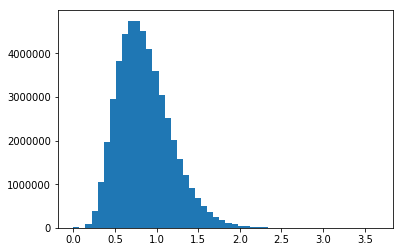

In [22]:
n1,b,p = plt.hist(USR,bins=50)

In [23]:
np.savetxt("usrmat_solv_50ps.dat",USR)